# Exploratory Data Analysis (EDA)

#### EDA is a process of examining a datasets to summarise its main characteristics

## It helps us:
#### - detect patterns and relationship
#### - Handles missing values
#### - Prepare data for modeling

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_clean.csv')
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [3]:
# take backup of data before making any changs
data_bkup = df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [5]:
df.shape

(158, 10)

In [6]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [7]:
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [8]:
print(df['Ozone'].isna().sum())

38


## Data type conversion

In [9]:
#df['Month'] = pd.to_numeric(df['Month'])
# this will show an error

In [10]:
df['Month'].head(25)

0       5
1       5
2       5
3       5
4       5
5       5
6       5
7       5
8       5
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      5
17      5
18      5
19      5
20      5
21      5
22      5
23    May
24      5
Name: Month, dtype: object

In [11]:
# so, may is invalid in month column that why it is replaced
df['Month'] = df['Month'].replace('May', 5)
df['Month'].head(25)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
Name: Month, dtype: object

In [12]:
df['Month'] = pd.to_numeric(df['Month'], errors = 'coerce') # errors = 'coerce' force to convert any other value like May to nan

In [13]:
df['Month'].head(25)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
Name: Month, dtype: int64

In [14]:
df['Temp C'] = pd.to_numeric(df['Temp C'], errors = 'coerce')
df['Weather'] = df['Weather'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       158 non-null    int64   
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(4), int64(5)
memory usage: 11.5 KB


## Duplicates

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [17]:
# count duplicate rows
df[df.duplicated()].shape

(0, 10)

In [18]:
# print all duplicated row
df[df.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [19]:
# in case if we find duplicates, we need to drop them
df = df.drop_duplicates()

In [20]:
df.shape

(158, 10)

### drop column which are not important

In [21]:
data_bkup1 = df # taking backup one more time

In [22]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5,5,2010,56,S


In [23]:
df = df.drop('Unnamed: 0', axis = 1) # delete specific column

In [24]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5,1,2010,67,S
1,36.0,118.0,8.0,72.0,5,2,2010,72,C
2,12.0,149.0,12.6,74.0,5,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5,4,2010,62,S
4,NaN,NaN,14.3,56.0,5,5,2010,56,S


In [25]:
# drop column tempc 
df = df.drop('Temp C', axis = 1)

In [26]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


## Rename the columns

In [27]:
df = df.rename({'Solar.R' : 'Solar'}, axis = 1)
# {'Solar.R' : 'Solar'}: This is a dictionary mapping the old column name ('Solar.R') to the new column name ('Solar').
# axis = 1: This specifies that the renaming should be applied to the columns (axis 1) rather than the index (axis 0).

In [28]:
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


## Handling missing values

In [29]:
cols = df.columns
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

<Axes: >

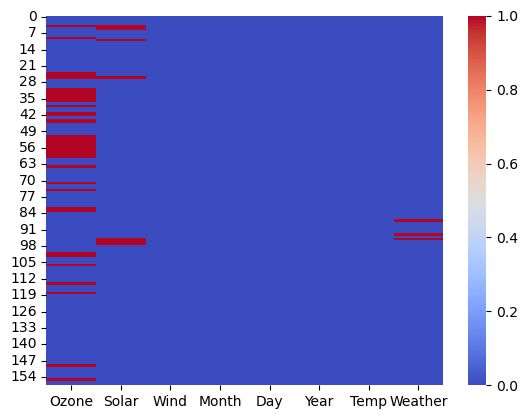

In [30]:
import seaborn as sns
#sns.heatmap(df[cols].isnull(), cmap = 'coolwarm')
#colors = ['#000099', '#ffff00'] # first one is for yellow(null) and second one is blue(non_null)
#sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))
sns.heatmap(df[cols].isnull(), cmap = 'coolwarm')

# df[cols].isnull(): This creates a DataFrame of boolean values (True for missing, False for present).
# Seaborn's heatmap treats these booleans numerically, where False maps to 0 and True maps to 1.
# cmap = ...: The custom color palette is then assigned to the cmap argument of the sns.heatmap() function, 
# applying the specified colors to the null and non-null values in your data. 

In [31]:
# yellow color shows missing values in each column
# Ozone column have the most missing values
# Weather and Solar column have few null values

In [32]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [33]:
# chech whether Ozone has outlier or not

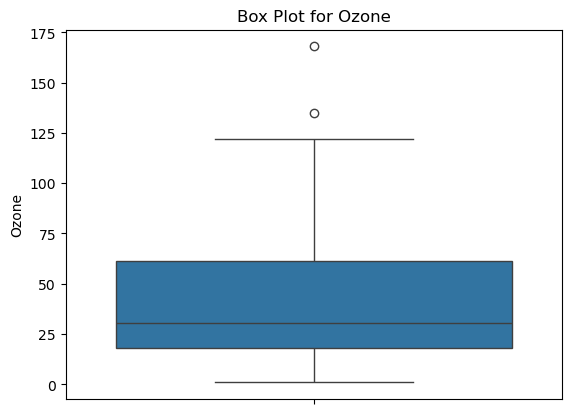

In [34]:
import matplotlib.pyplot as plt

sns.boxplot(y = df['Ozone'])
plt.title('Box Plot for Ozone')
plt.show()

In [35]:
# Cal. Q1 and Q3
Q1 = df['Ozone'].quantile(.25)
Q3 = df['Ozone'].quantile(.75)
IQR = Q3-Q1
# define outlier bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# find outliers
outlier = df[(df['Ozone'] < lower_bound) | (df['Ozone'] > upper_bound)]
print(f'Number of outliers: {outlier.shape[0]}')


# Q1 = df['Ozone'].quantile(.25)
# This line calculates the first quartile (Q1), which is the 25th percentile of the data in the Ozone column of the DataFrame df. It represents the value below which 25% of the data falls.
# Q3 = df['Ozone'].quantile(.75)
# This line calculates the third quartile (Q3), which is the 75th percentile. It represents the value below which 75% of the data falls.
# IQR = Q3-Q1
# This line calculates the Interquartile Range (IQR) by subtracting Q1 from Q3. The IQR measures the spread of the middle 50% of the data.
# # define outlier bounds
# This is a comment (ignored by Python) providing context for the next two lines.
# lower_bound = Q1 - 1.5*IQR
# This line calculates the lower bound for identifying outliers. The IQR method defines any data point significantly below Q1 as an outlier. The standard "fence" is 1.5 times the IQR below Q1.
# upper_bound = Q3 + 1.5*IQR
# This line calculates the upper bound. Any data point significantly above Q3 is defined as an outlier. The standard "fence" is 1.5 times the IQR above Q3.
# # find outliers
# This is another comment providing context.
# outlier = df[(df['Ozone'] < lower_bound) | (df['Ozone'] > upper_bound)]
# This line filters the original DataFrame df to select rows where the Ozone value is either below the lower_bound (using the | "or" operator) or above the upper_bound. The result is a new DataFrame named outlier containing only the outlier rows.
# print(f'Number of outliers: {outlier.shape[0]}')
#This line prints the total number of outliers found. outlier.shape returns a tuple representing the dimensions of the outlier DataFrame, and [0] accesses the first element of that tuple, which is the number of rows (i.e., the count of outliers

Number of outliers: 2


In [36]:
# filled nan with mediam
median = df['Ozone'].median()

df['Ozone'] = df['Ozone'].fillna(median)
df[['Ozone']]

,Ozone
0,41.0
1,36.0
2,12.0
3,18.0
4,30.5
...,...
153,41.0
154,30.0
155,30.5
156,14.0


In [37]:
# check if there is nan present or not
df['Ozone'].isna().sum()

np.int64(0)

In [38]:
# check solar nan and handle them

In [39]:
df['Solar'].isna().sum()

np.int64(7)

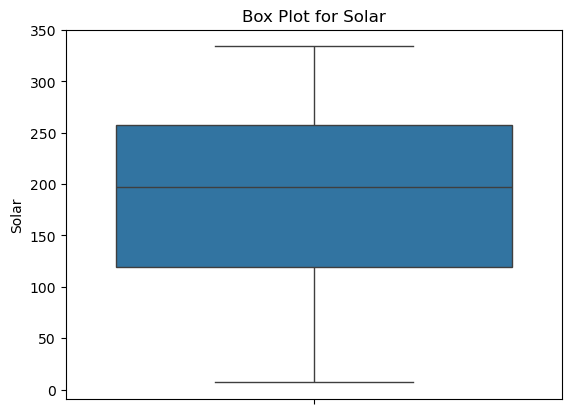

In [40]:
# Now use boxplot for checking outliers 
sns.boxplot(y= df['Solar'])
plt.title('Box Plot for Solar')
plt.show()

In [41]:
# Cal. outlier with statistical method
Q1 = df['Solar'].quantile(.25)
Q3 = df['Solar'].quantile(.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound =  Q3 + 1.5*IQR

outliers = df[(df['Solar'] < lower_bound)| (df['Solar'] > upper_bound)]
print(f'numbers of outlier: {outliers.shape[0]}')

numbers of outlier: 0


In [42]:
# Here, no outlier, that's why we replace nan by 
mean = df['Solar'].mean()
df['Solar'] = df['Solar'].fillna(mean)

In [43]:
df['Solar'].isna().sum()

np.int64(0)

In [44]:
# for weather

In [45]:
df['Weather'].isna().sum()

np.int64(3)

In [46]:
# replace nan with mode
mode = df['Weather'].mode()[0]
mode

'S'

In [47]:
df['Weather'] = df['Weather'].fillna(mode)

In [48]:
df['Weather'].isnull().sum()

np.int64(0)

In [49]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

## How to detect outlier

<Axes: >

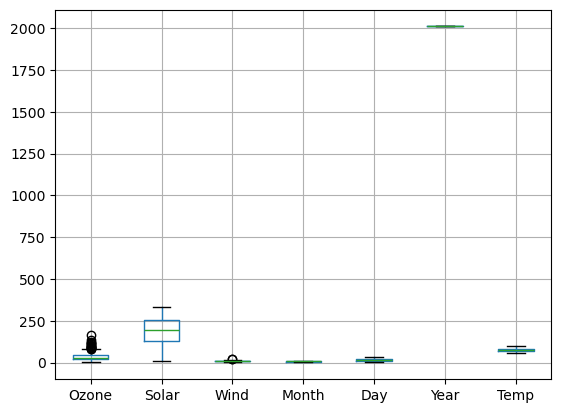

In [50]:
df.boxplot()

In [51]:
 # Cal. outlier for wind 
Q1 = df['Wind'].quantile(.25)
Q3 = df['Wind'].quantile(.75)
IQR = Q3-Q1
# define outlier bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# find outliers
outlier = df[(df['Wind'] < lower_bound) | (df['Wind'] > upper_bound)]
print(f'Number of outliers: {outlier.shape[0]}')


Number of outliers: 2


In [52]:
median_value = df['Wind'].median()
median_value

9.7

In [53]:
# replace outlier with median
df.loc[df['Wind']< lower_bound, 'Wind'] = median_value
df.loc[df['Wind'] > upper_bound, 'Wind'] = median_value

# df['Wind'] < lower_bound: This creates a boolean mask (a series of True/False values).
# It checks every row in the 'Wind' column to see if it is lower than a pre-calculated lower_bound.
# df.loc[..., 'Wind']: The .loc accessor selects the rows where the mask is True and targets only the 'Wind' column for those rows.
# = median_value: This assigns the median_value (pre-calculated) to all the cells identified as outliers, replacing the extreme low values. 

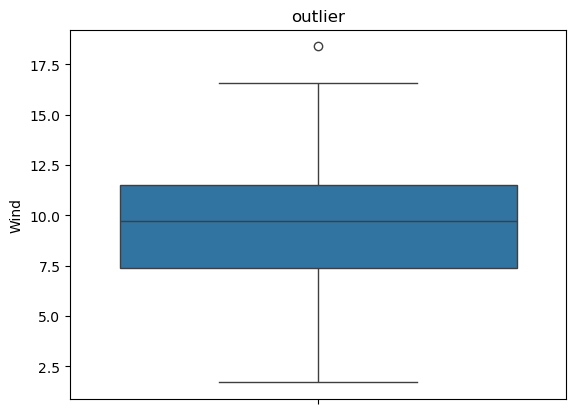

In [54]:
# to check outlier is impute or not
sns.boxplot(y = df['Wind'])
plt.title('outlier')
plt.show()

In [55]:
outlier = df[(df['Wind'] < lower_bound) | (df['Wind'] > upper_bound)]
print(f'Number of outliers: {outlier.shape[0]}')

Number of outliers: 0


In [56]:
 # Cal. outlier for wind 
Q1 = df['Ozone'].quantile(.25)
Q3 = df['Ozone'].quantile(.75)
IQR = Q3-Q1
# define outlier bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# find outliers
outlier = df[(df['Ozone'] < lower_bound) | (df['Ozone'] > upper_bound)]
print(f'Number of outliers: {outlier.shape[0]}')

Number of outliers: 16


In [57]:
median_val = df['Ozone'].median()
print(median_val)

30.5


In [58]:
df.loc[df['Ozone']< lower_bound, 'Ozone'] = median_val
df.loc[df['Ozone'] > upper_bound, 'Ozone'] = median_val

In [59]:
# check outlier
outlier = df[(df['Ozone'] < lower_bound) | (df['Ozone'] > upper_bound)]
print(f'Number of outliers: {outlier.shape[0]}')

Number of outliers: 0


## Scatter Plot and Correlation Analysis

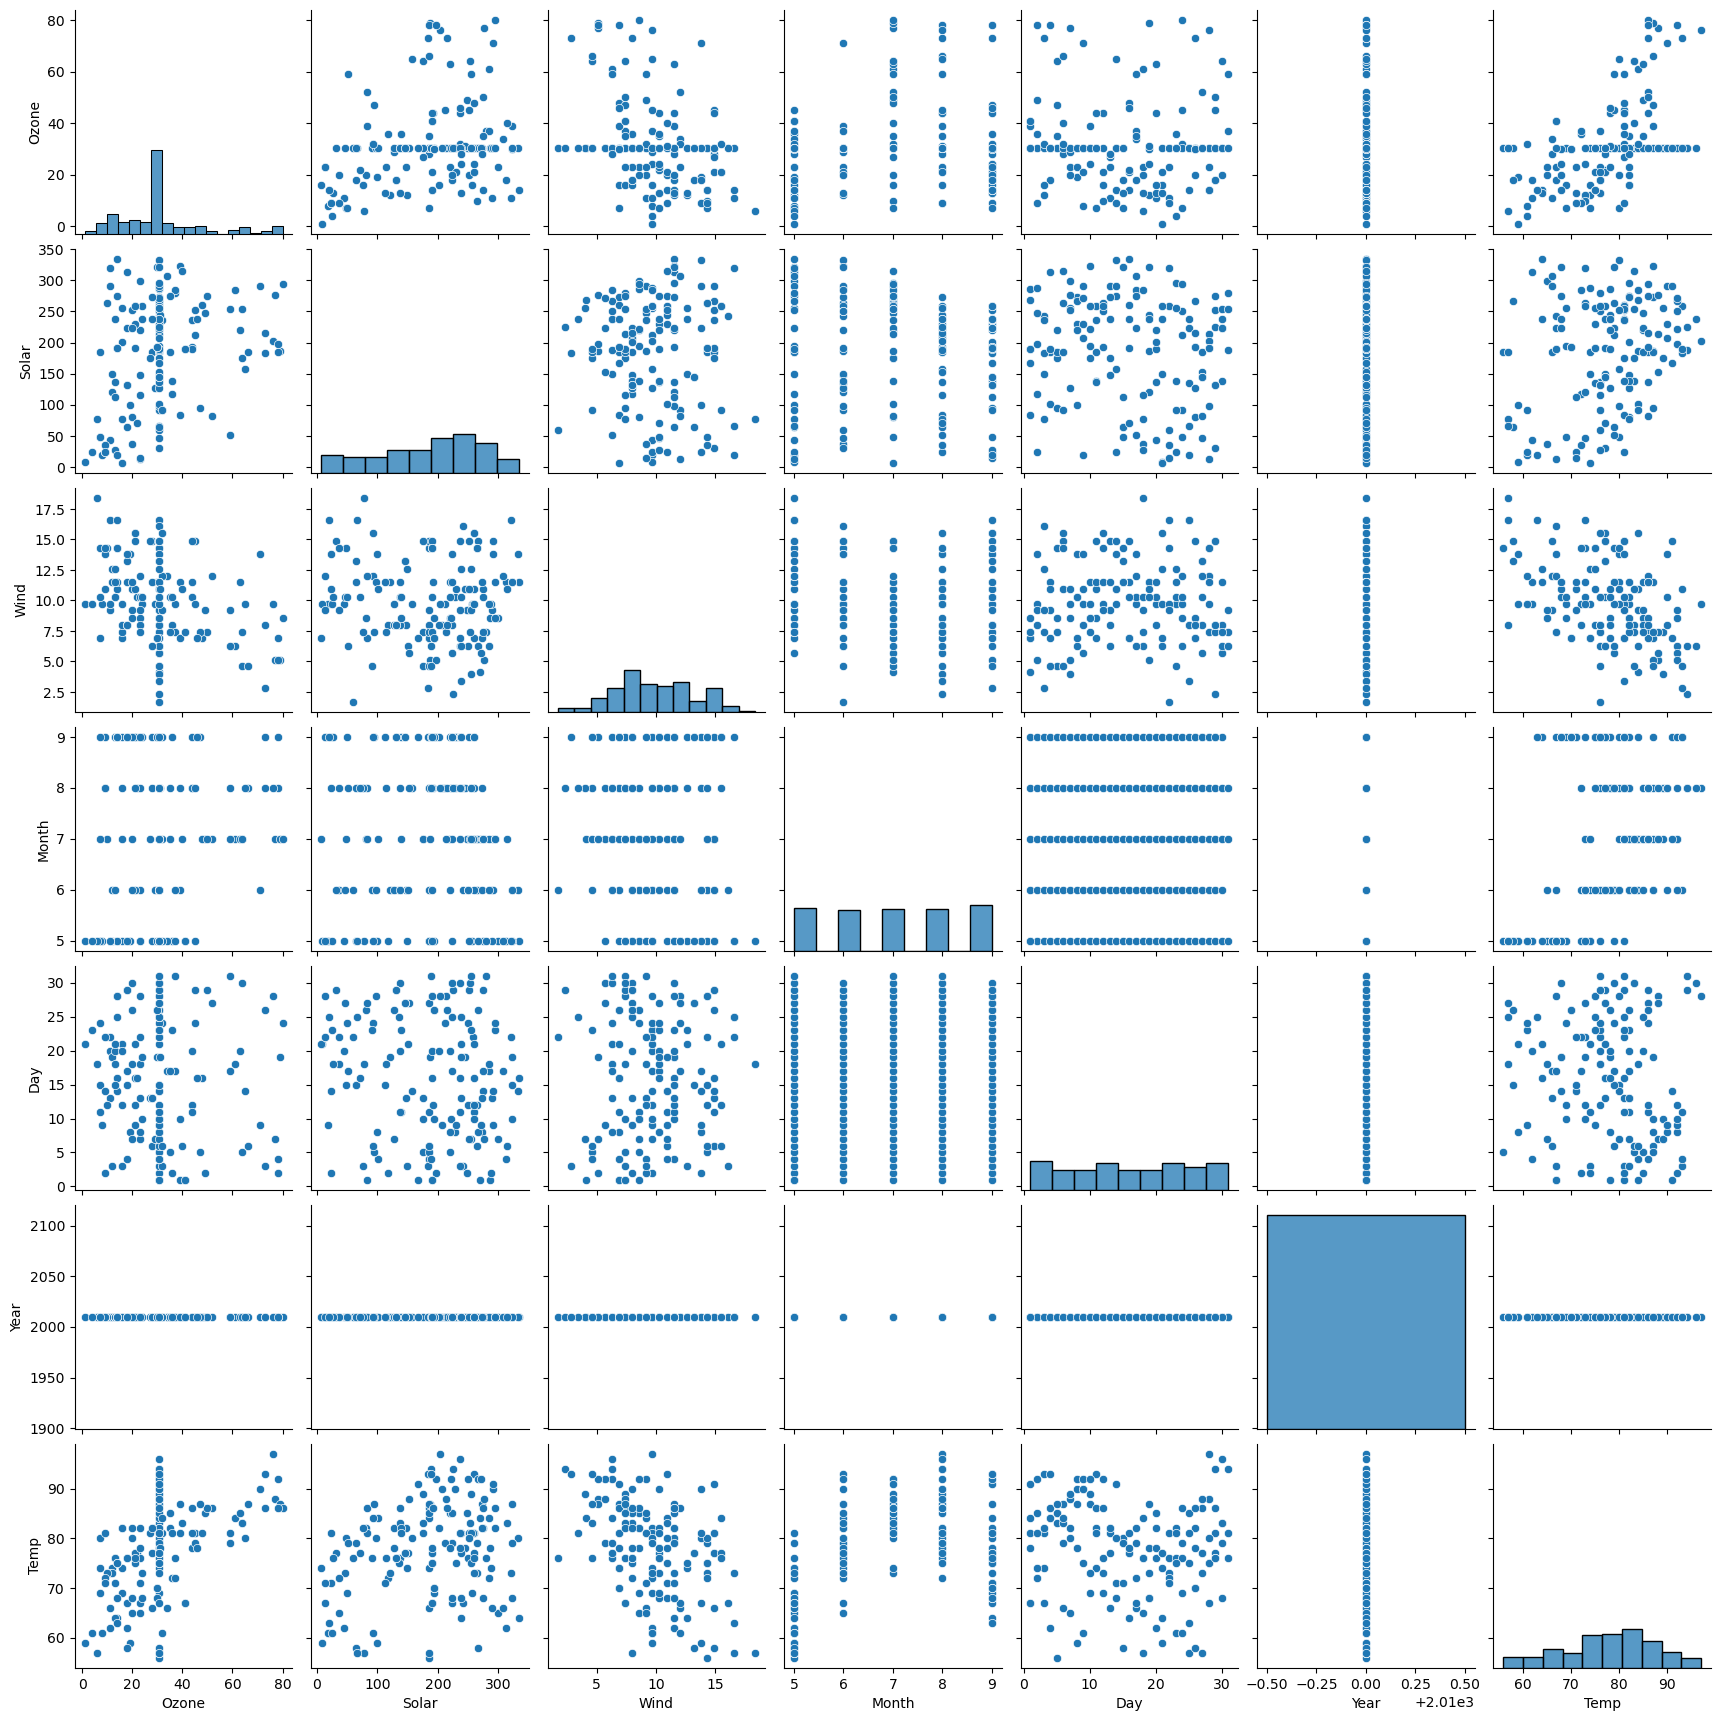

In [60]:
sns.pairplot(df)

In [61]:
# Correlation
df.select_dtypes(include = ['number']).corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.288578,-0.354190,0.120973,-0.066719,NaN,0.511967
Solar,0.288578,1.000000,-0.044178,-0.079196,-0.149606,NaN,0.260473
Wind,-0.354190,-0.044178,1.000000,-0.123958,0.055928,NaN,-0.420121
Month,0.120973,-0.079196,-0.123958,1.000000,0.052646,NaN,0.402942
Day,-0.066719,-0.149606,0.055928,0.052646,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.511967,0.260473,-0.420121,0.402942,-0.124538,NaN,1.000000


## Dummy Variable
##### - it is a numeric(0/1) representation of categorical data

In [62]:
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5,1,2010,67,S
1,36.0,118.000000,8.0,5,2,2010,72,C
2,12.0,149.000000,12.6,5,3,2010,74,PS
3,18.0,313.000000,11.5,5,4,2010,62,S
4,30.5,185.403974,14.3,5,5,2010,56,S


In [63]:
# Creating dummy variable for column Weather
#df = pd.get_dummies(df, columns = ['Weather'])

In [64]:
df['Weather'].isna().sum()

np.int64(0)

In [65]:
df = pd.get_dummies(df, columns = ['Weather']).astype(int)


In [67]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41,190,7,5,1,2010,67,0,0,1
1,36,118,8,5,2,2010,72,1,0,0
2,12,149,12,5,3,2010,74,0,1,0
3,18,313,11,5,4,2010,62,0,0,1
4,30,185,14,5,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
153,41,190,7,5,1,2010,67,1,0,0
154,30,193,6,9,26,2010,70,0,1,0
155,30,145,13,9,27,2010,77,0,0,1
156,14,191,14,9,28,2010,75,0,0,1


## Normalization of the data

In [69]:
# Normalization in machine learning is the process of scaling numerical data to a common range, usually between 0 and 1, 
# without changing the relative differences between values. 
# It ensures that features with large numbers (like income) do not dominate features with small numbers (like age) during model training,
# allowing algorithms to perform better. 

#### Two common techniques for normalize data are 'StandadScalar' and 'MinMaxScalar'

In [71]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


# from numpy import set_printoptions: This imports the set_printoptions function from the NumPy library. 
# This function is used to configure how floating-point values and arrays are displayed when printed 
# (e.g., setting the precision of decimal points, suppressing small values, etc.).

# from sklearn.preprocessing import MinMaxScaler: This imports the MinMaxScaler class from scikit-learn's preprocessing module. The MinMaxScaler 
# is a data preprocessing tool used to transform features by scaling each feature to a given range, typically between 0 and 1. 
# This normalization step is important for many machine learning algorithms. 

In [73]:
arr = df.values
arr

array([[ 41, 190,   7, ...,   0,   0,   1],
       [ 36, 118,   8, ...,   1,   0,   0],
       [ 12, 149,  12, ...,   0,   1,   0],
       ...,
       [ 30, 145,  13, ...,   0,   0,   1],
       [ 14, 191,  14, ...,   0,   0,   1],
       [ 18, 131,   8, ...,   1,   0,   0]], shape=(158, 10))

In [74]:
# normalize the data
scaler = MinMaxScaler(feature_range = (0, 1))
rescale = scaler.fit_transform(arr)

# MinMaxScaler(feature_range=(0, 1)): You are telling the computer, 
# "I want the smallest number in my data to become 0, the biggest to become 1, and everything else to be a decimal in between".

#     fit_transform(arr):
# Fit: The computer looks at your data to find the current minimum and maximum values.
# Transform: It does the math to change every value to its new "squished" version. 

In [77]:
set_printoptions(precision = 2)
# set_printoptions(precision=2) 
# This tells the computer how to show you the numbers. 
# Precision=2: It limits the output to 2 decimal places (e.g., 0.12345 becomes 0.12).
# Global Change: Once you run this, all future NumPy arrays you print in this session will follow this rule until you change it back. 

print(rescale[0:5, :])

[[0.51 0.56 0.35 0.   0.   0.   0.27 0.   0.   1.  ]
 [0.44 0.34 0.41 0.   0.03 0.   0.39 1.   0.   0.  ]
 [0.14 0.43 0.65 0.   0.07 0.   0.44 0.   1.   0.  ]
 [0.22 0.94 0.59 0.   0.1  0.   0.15 0.   0.   1.  ]
 [0.37 0.54 0.76 0.   0.13 0.   0.   0.   0.   1.  ]]


In [85]:
# standardize the data
from sklearn.preprocessing import StandardScaler

In [88]:
array = df.values
scalar = StandardScaler()
scalar.fit(array)
rescale = scalar.transform(array)

print(rescale[0:5, :])

[[ 0.59  0.05 -0.72 -1.42 -1.67  0.   -1.15 -0.67 -0.65  1.24]
 [ 0.29 -0.78 -0.41 -1.42 -1.56  0.   -0.61  1.49 -0.65 -0.8 ]
 [-1.15 -0.42  0.81 -1.42 -1.45  0.   -0.4  -0.67  1.54 -0.8 ]
 [-0.79  1.48  0.51 -1.42 -1.34  0.   -1.68 -0.67 -0.65  1.24]
 [-0.07 -0.    1.43 -1.42 -1.23  0.   -2.32 -0.67 -0.65  1.24]]
